!pip3 install labelImg
!pip install PyQt5
!pip install lxml

In [19]:
import torch

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
torch.cuda.is_available()

True

In [23]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14156, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14156 (delta 10), reused 19 (delta 7), pack-reused 14130
Receiving objects: 100% (14156/14156), 13.54 MiB | 8.29 MiB/s, done.
Resolving deltas: 100% (9727/9727), done.


In [24]:
cd yolov5

/content/yolov5/yolov5


In [25]:
!pip install -qr requirements.txt # install dependencies
!pip install -q roboflow

In [ ]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
!python ./train.py --img 640 --batch 16 --epochs 50 --data ../drive/MyDrive/Colab_Notebooks/custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=../drive/MyDrive/Colab_Notebooks/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, 

In [ ]:
!python export.py --weights /content/drive/MyDrive/Colab_Notebooks/best.pt --include tflite --img 640

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/Colab_Notebooks/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/Colab_Notebooks/best.pt with output shape (1, 25200, 8) (13.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2022-11-25 13:35:22.748212: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0           

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite', force_reload=True)
model.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-25 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite for TensorFlow Lite inference...
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend()
)

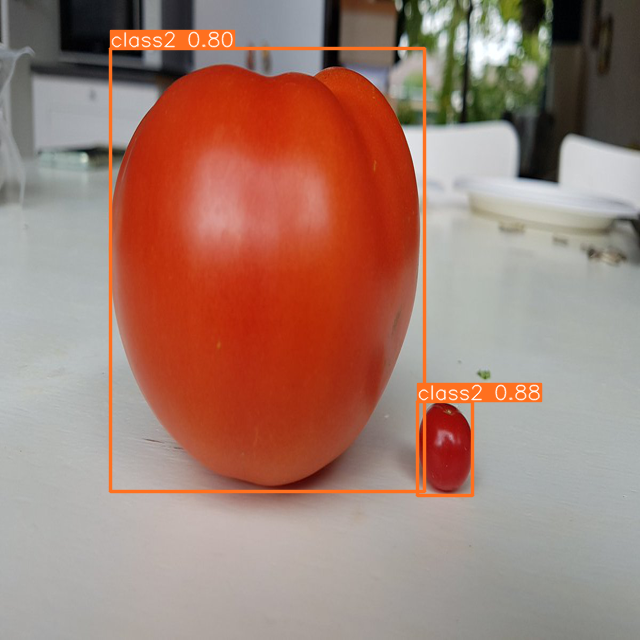

In [30]:
import numpy as np
from PIL import Image

image = Image.open('/content/drive/MyDrive/Colab_Notebooks/images/train/320.jpg')
new_image = image.resize((640, 640))

result = model(new_image, size=640)
result.show()

Saved 1 image to runs/detect/exp9


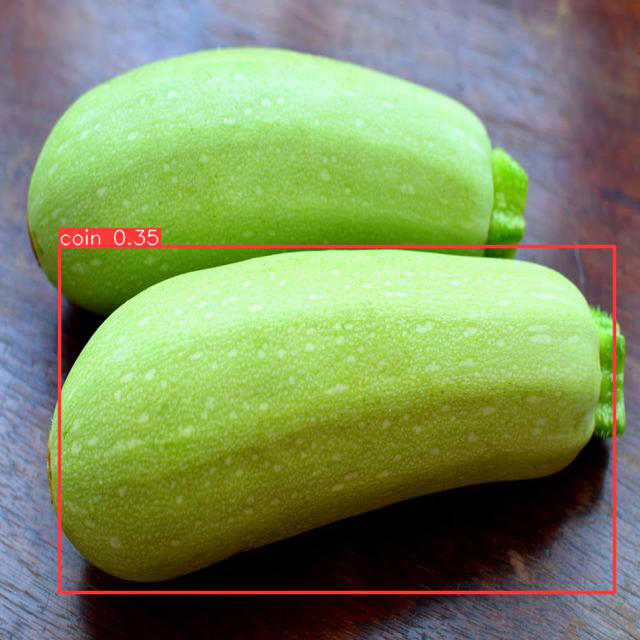

In [ ]:
imgResult = Image.open('/content/yolov5/runs/detect/exp3/image0.jpg')
imgResult

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite --img 640 --conf 0.25 --source /content/drive/MyDrive/Colab_Notebooks/images/val/355.jpg

detect: weights=['/content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite'], source=/content/drive/MyDrive/Colab_Notebooks/images/val/355.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-266-g72cad39 Python-3.7.15 torch-1.12.1+cu113 CPU

Loading /content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/1 /content/drive/MyDrive/Colab_Notebooks/images/val/355.jpg: 640x640 1 horse, 1061.2ms
Speed: 14.9ms pre-process, 1061.2ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
modelTFLite = torch.hub.load('ultralytics/yolov5', 'custom', '../lab03/Image_Set/yolov5/runs/train/exp2/weights/best-fp16.tflite', force_reload=True)

image 1/1: 533x800 2 cucumbers, 2 tomatoess
Speed: 14.1ms pre-process, 10.1ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp9


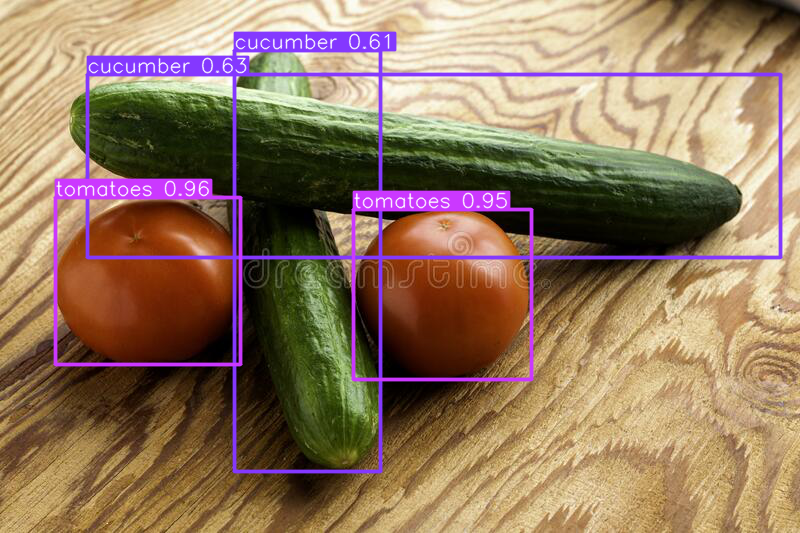

In [ ]:
import cv2
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab_Notebooks/images/train/100.jpg')

results = model(img, size=640)
results.print() 
results.save()
results.show()  # or .show(), .save(), .crop(), .pandas(), etc# or .show(), .save(), .crop(), .pandas(), etc

In [ ]:
import cv2
from PIL import Image

img = Image.open('../96.png')

results = model(img, size=640)
results.print() 
results.save()
results.show()

In [ ]:
import cv2
from PIL import Image

img = Image.open('../24.jpg')

results = model(img, size=640)
results.print() 
results.save()
results.show()